In [ ]:
# !git clone https://github.com/recepgul82/music-digital-methods.git
# !pip install -r music-digital-methods/setup/requirements.txt

In [ ]:
import sys
from pathlib import Path

# Find repo root by walking up until course_code exists
REPO_ROOT = Path.cwd()
while not (REPO_ROOT / "course_code").exists():
    if REPO_ROOT == REPO_ROOT.parent:
        raise RuntimeError("course_code not found")
    REPO_ROOT = REPO_ROOT.parent

sys.path.insert(0, str(REPO_ROOT))


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from course_code.spotify.client import get_spotify_client
from course_code.spotify.fetch import fetch_playlist_tracks

In [ ]:
import os
os.environ["SPOTIPY_CLIENT_ID"] = "..."
os.environ["SPOTIPY_CLIENT_SECRET"] = "..."

In [5]:
# --- credentials (set as environment variables) ---
SPOTIFY_CLIENT_ID = os.getenv("SPOTIFY_CLIENT_ID")
SPOTIFY_CLIENT_SECRET = os.getenv("SPOTIFY_CLIENT_SECRET")

sp = get_spotify_client(
    client_id=SPOTIFY_CLIENT_ID,
    client_secret=SPOTIFY_CLIENT_SECRET
)

In [6]:
# --- fetch data ---
PLAYLIST_ID = "5pNNCxNEhl5tKxkI9kFAoW" #Top Songs Turkey
df = fetch_playlist_tracks(sp, PLAYLIST_ID, limit=100)

In [7]:
# --- quick inspection ---
df.head()

,track_id,track_name,artist,album,release_date,release_date_precision,duration,popularity
0,58jQG1WGxnMvHmhmJMm8E2,Asrın Hatası,Serdar Ortaç,Bilsem Ki (2000),1999-10-21,day,82.692500,58
1,6kECq8AYAbvAQ5De1KQxwa,Deli Divane,Ebru Gündeş,Kurtlar Sofrası,1996-12-13,day,63.722222,52
2,0DTOdqHdyxS4EsvRmkX1Jt,Şeytan,Özgün,Elveda,2005-10-14,day,76.733333,0
3,2V7YJEnUoW3Uv0cyZkm9aq,Uçurum,Murat Boz,Şans,2009-02-24,day,86.739167,57
4,3DiGgep32KjIvhrvQv5bAU,Yanayım Yanayım,"Babutsa, Soner Türsoy, Pervin Peri Tevfik, Ali...",Tabi Güzelim,2010-09-03,day,77.902500,45


In [8]:
# --- simple analysis ---
df[["popularity", "duration"]].corr()


,popularity,duration
popularity,1.000000,-0.096061
duration,-0.096061,1.000000


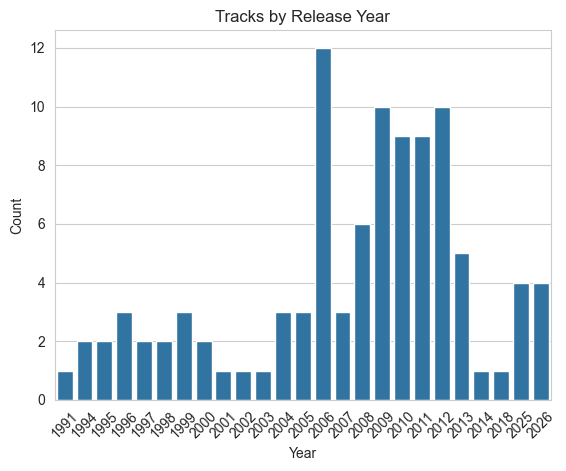

In [11]:
import seaborn as sns

sns.set_style("whitegrid")

year_counts = (
    df["release_date"]
    .str[:4]
    .value_counts()
    .sort_index()
    .reset_index()
)
year_counts.columns = ["year", "count"]

sns.barplot(data=year_counts, x="year", y="count")
plt.title("Tracks by Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
